In [1]:
import cv2
import matplotlib.pyplot as plt
from copy import copy
import pandas as pd
import os
from sklearn.manifold import TSNE
import numpy as np

from sklearn.decomposition import PCA

In [2]:
def img_into_pixels(path_to_img):
    '''В этой функции мы каждый пиксель разделяем на три канала - RGB'''
    img = cv2.imread(path_to_img)

#convert from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#get rgb values from image to 1D array
    r, g, b = cv2.split(img)
    r = r.flatten()
    g = g.flatten()
    b = b.flatten()
    
    return r, g, b

In [14]:
directory = '/Users/tonleon/Documents/GitHub/Diploma/Films/trial'
data = []
src = []
for file in os.listdir(directory):
    if file.endswith('.jpg'):
        src.append(os.path.join(directory, file))
        pixels = img_into_pixels(os.path.join(directory, file))
        data.append(np.array(pixels).flatten()) #делаем список из слитых матриц rgb для каждой картинки -
                                                #в итоге у нас один длинный вектор на каждую картинку
data = np.array(data)
src = ["/Users/tonleon/Documents/GitHub/Diploma/Films/trial/{}_frame.jpg".format(i) for i in range(1, len(src) + 1)]

In [32]:
data.shape

(5, 2081280)

In [29]:
pca = PCA()
pca_data = pca.fit_transform(data)

In [33]:
data_r = data[:, :data.shape[1] // 3]
pca_data_r = pca.fit_transform(data_r)

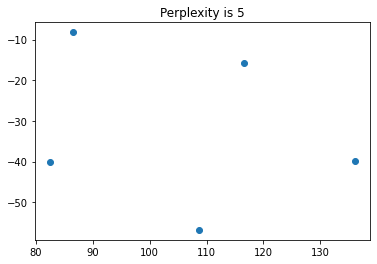

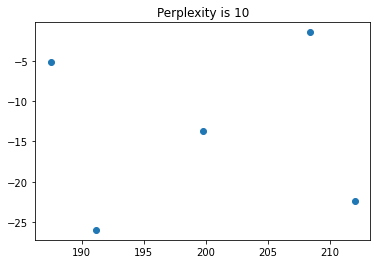

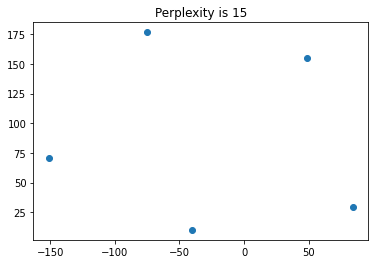

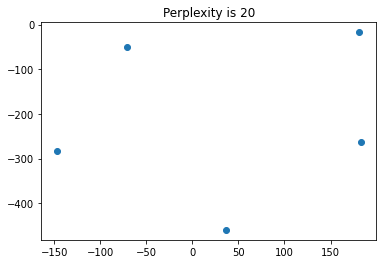

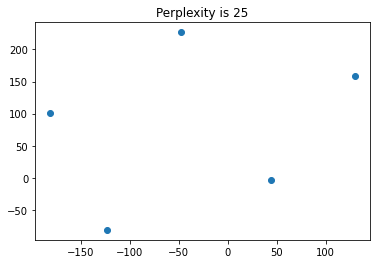

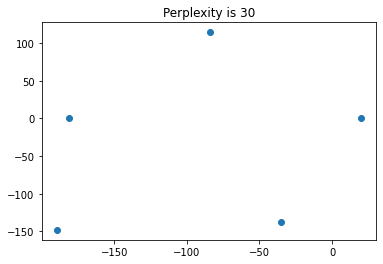

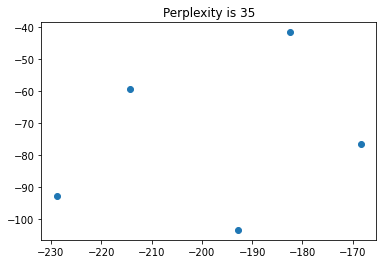

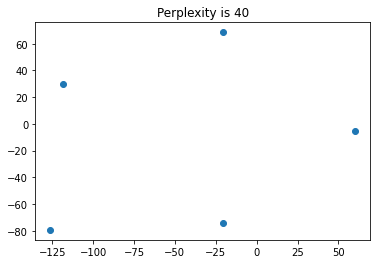

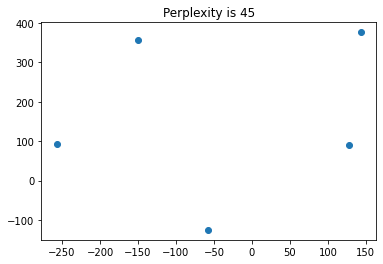

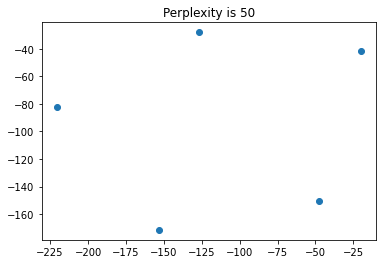

In [34]:
perplexity_r = range(5, 55, 5)
for perplexity in perplexity_r:
    tsne = TSNE(2, perplexity=perplexity)
    tsne_data = tsne.fit_transform(data_r)#fit загружает в алгоритм данные и обучает алгоритм сжатия данных
                                            #а transform преобразует из многомерной матрицы в матрицу нужного размера
    
    plt.scatter(tsne_data[:,0], tsne_data[:, 1])
    plt.title("Perplexity is {}".format(perplexity))
    plt.show()